In [1]:
%load_ext autoreload
%autoreload 2

from RBM import *
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# it's interesting to test this code with p == 1.0 or p == 0.0 ;)
p = .8
X_train = np.random.binomial(n=1, p=p, size=(200, 2))
X_test  = np.random.binomial(n=1, p=p, size=(200, 2))

In [3]:
nn = RBM(layers=[
        BernoulliLayer(X_train.shape[1]),
        BernoulliLayer(3)
    ], loss_function='NLL')
nn.fit(X_train, n_epochs=100, learning_rate=.01, n_gibbs_steps=1, batch_size=10, test_size=0)

Initialisation...
weights:
[[ 0.00661782 -0.00128594  0.01195124]
 [-0.00673377 -0.00420466  0.0160529 ]]
bias (visible):
[[ 0.  0.]]
bias (hidden):
[[ 0.  0.  0.]]

epoch = 99; criteria = 1.07593887655; learning_rate = 0.01 


In [4]:
print 'weights:\n', nn.weights
print 'bias (visible):\n', nn.layers[0].bias
print 'bias (hidden):\n',  nn.layers[1].bias

weights:
[[ 0.37359131  0.40150448  0.29936445]
 [ 0.2573638   0.28429204  0.28146743]]
bias (visible):
[[ 0.644  0.494]]
bias (hidden):
[[ 0.00194291  0.08254541 -0.00129109]]


In [5]:
nn.predict_proba(X_train), np.mean(X_train, axis=0), p

(array([ 0.78683711,  0.73247536]), array([ 0.795,  0.735]), 0.8)

In [6]:
nn.predict_proba(X_test), np.mean(X_test, axis=0), p

(array([ 0.7805578 ,  0.72706818]), array([ 0.77,  0.84]), 0.8)

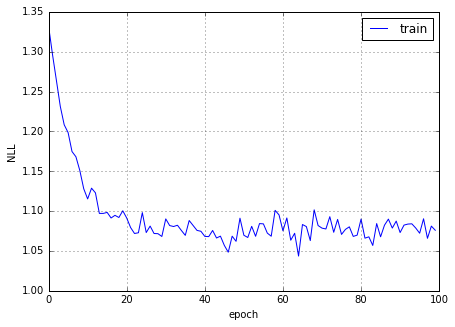

In [7]:
plt.figure(figsize=(7, 5))
plt.plot(nn.error_train, label='train')
if nn.error_test:
    plt.plot(nn.error_test, label='CV')
plt.xlabel('epoch')
plt.ylabel(nn.loss_function)
plt.legend()
plt.grid()